# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [65]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
   
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [66]:
### To start off let's do a basic data summary.
import numpy as np
from collections import Counter
# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = np.shape(X_train[0])

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


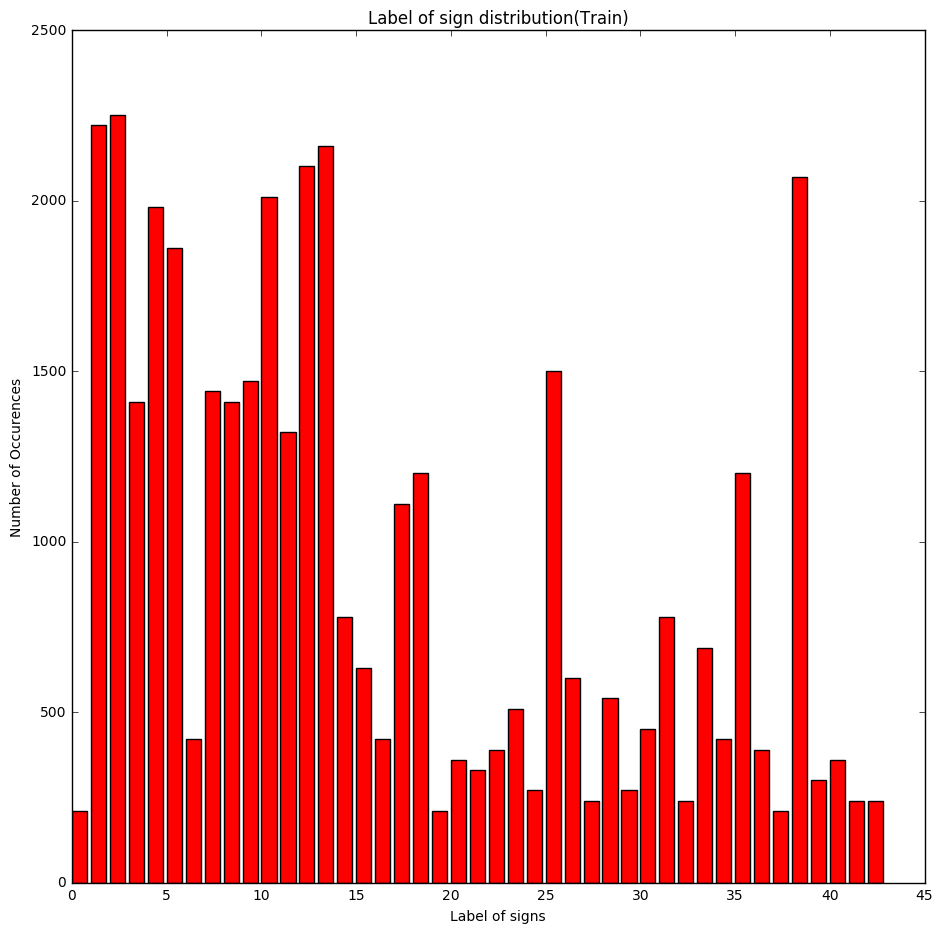

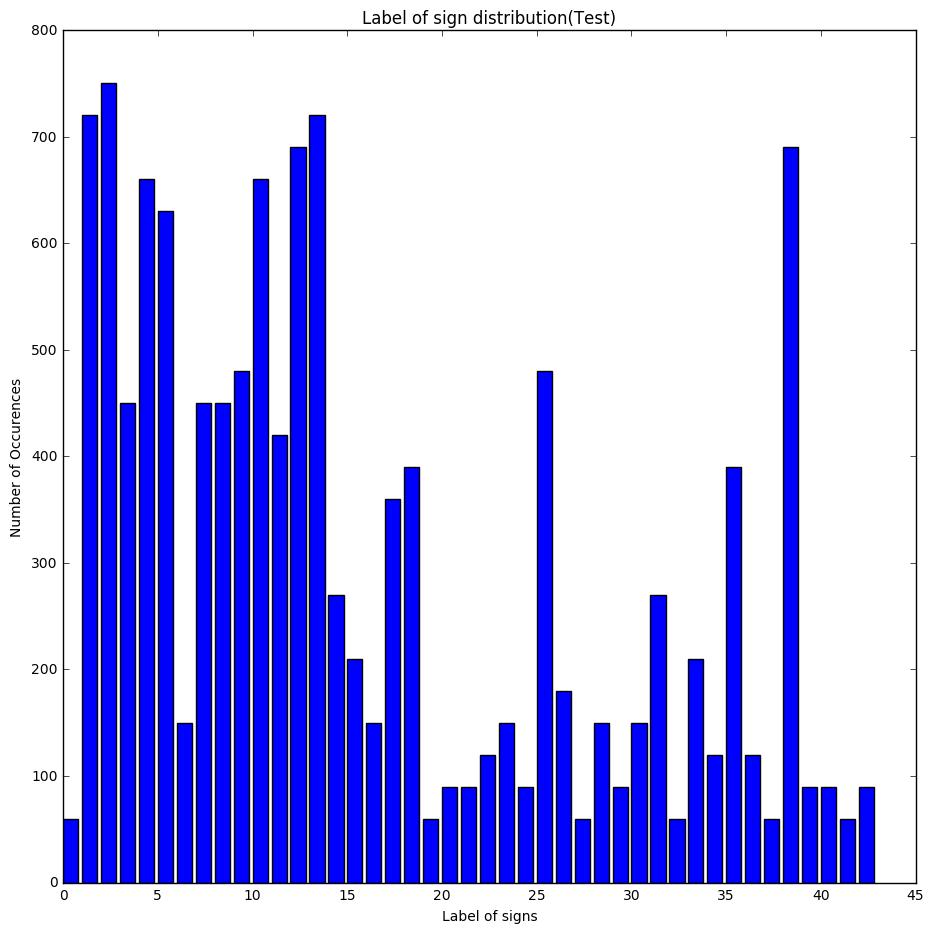

In [67]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt


# Data visulization of training datasets
fig, ax = plt.subplots()
d = Counter(y_train)
ax.bar(d.keys(), d.values(), color = 'r')
ax.set_ylabel('Number of Occurences')
ax.set_xlabel('Label of signs')
ax.set_title('Label of sign distribution(Train)')
plt.show()


# Data visulization of testing datasets
fig, ax = plt.subplots()
d = Counter(y_test)
ax.bar(d.keys(), d.values(), color = 'b')
ax.set_ylabel('Number of Occurences')
ax.set_xlabel('Label of signs')
ax.set_title('Label of sign distribution(Test)')
plt.show()

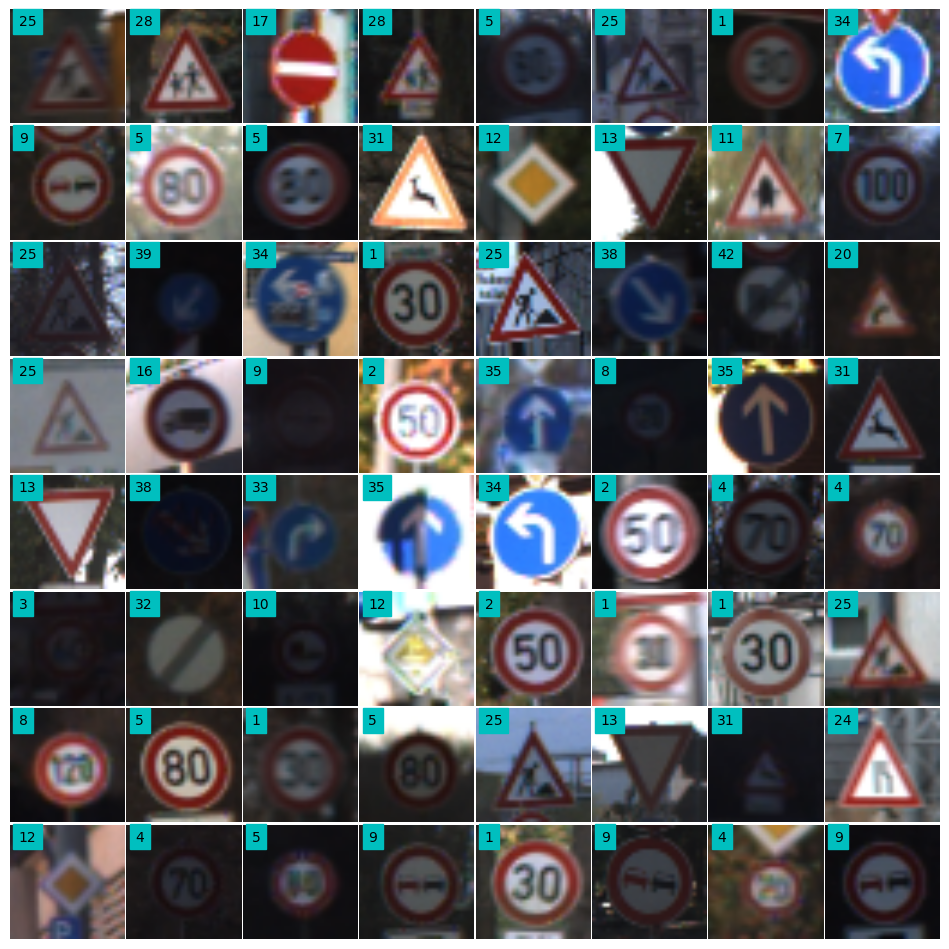

In [68]:
import matplotlib.gridspec as gridspec
def random_plot(n_row,n_col,X,y):
    """
    Randomly plot some images from training datasets
    """
    plt.figure(figsize = (12,12))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show() 
random_plot(8,8,X_train,y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Label: 4


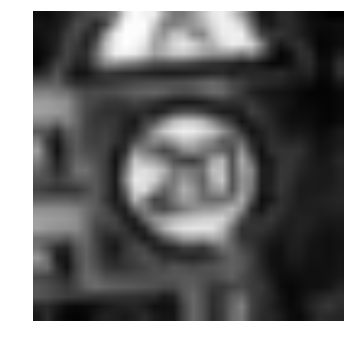

In [69]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
a = 20
#print(Image1)
#print(Image1.dtype)
gray = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray,cmap='gray')
#print(np.shape(X_train[3000]))
#print(np.shape(gray))
print('Label:',y_test[a])

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

    First, I have used train_test_split package from sklearn library for seperating the training datasets into training datasets and validate datasets. 
    
    Then, I created a function for transfering all the RGB images to Grey images using OpenCV. The reason why I do this is the accuracy is actually higher when i trafer the images to Grey after trials. 

In [70]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cross_validation import train_test_split
print('Train datasets are split into train datasets and valid datasets')
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
def RGB_Gray(data):
    #print(len(data))
    Train_label = np.ndarray([len(data),32,32], dtype='float32')
    for i in np.arange(len(data)):
        Train_label[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
    return Train_label
print('Train datasets RGB to Gray completed')
X_train = RGB_Gray(X_train)
print('Valid datasets RGB to Gray completed')
X_valid = RGB_Gray(X_valid)
print('Test datasets RGB to Gray completed')
X_test = RGB_Gray(X_test)
print(np.shape(X_train))

Train datasets are split into train datasets and valid datasets
Train datasets RGB to Gray completed
Valid datasets RGB to Gray completed
Test datasets RGB to Gray completed
(26270, 32, 32)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** 

    Training datasets can be used for model training, and validation datasets can be used for testing on the same datasets as model training process. 
        
    Finally, testing datasets is the final test and the datasets remain unchanged as the original testing data.

In [71]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
image_size = 32
num_labels = 43
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(X_train, y_train)
valid_dataset, valid_labels = reformat(X_valid, y_valid)
test_dataset, test_labels = reformat(X_test, y_test)
print(X_train.shape, y_train.shape)
print('Training datasets shape', train_dataset.shape, train_labels.shape)
print('Validation datasets shape', valid_dataset.shape, valid_labels.shape)
print('Test datasets shape', test_dataset.shape, test_labels.shape)
#print(test_labels[0:10])
#Store model if necessary
pickle_file = 'Data_model.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

(26270, 32, 32) (26270,)
Training datasets shape (26270, 32, 32, 1) (26270, 43)
Validation datasets shape (12939, 32, 32, 1) (12939, 43)
Test datasets shape (12630, 32, 32, 1) (12630, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 

        I have built a model of CNN using tensorflow, in which there are totally 7 layers. 

        L1: convolutional layer, batch_size x 28 x 28 x 16, convolution size: 5 x 5 x 1 x 16

        L2: Max_Pool layer, batch_size x 14 x 14 x 16

        L3: convolutional layer, batch_size x 10 x 10 x 32, convolution size: 5 x 5 x 16 x 32

        L4: Max_Pool layer, batch_size x 5 x 5 x 32

        L5: convolutional layer, batch_size x 1 x 1 x 64, convolution size: 5 x 5 x 32 x 64

        L6: fully-connected layer, weight size: 64 x 16

        L7: Output layer, weight size: 16 x 43


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 

    I have built a CNN model using the framework tensorflow and put all the training datasets in that model. 

    In this case, I have tried several optimizers like Adaptive gradient and Gradient descent, Gradient Descent is the best result I have gotten beyond all the optimizers I have chosen by comparing the results.
    
    I have set the batch size as 64 in this case.
    
    I have trid a lot of different iterations in the case, the accuracy is higher and higher with the increase of my interations, but the training time is too long after I set a too large iteration numbers. Finally, I chose 100,000 as my iterations and the result is very impressive. 


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

    I have completed a nano degree of Machine Learning Engineer last month, in which I did a project was House Number recognition, so the architecture in these two cases are similar. I have changed the methods about how to prepocess the data and how to build the model based on the situation in this case. 
    
    For optimizers, actually I have chosen two optimizers in this case, Gradient Descent and Adaptive Gradient. Because these two optimizers I am most familiar with. After repetitive trial, Gradient Descent has a better result in this case.
    
    For architecture, basically it is in reference to the architecture in this link https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/4_convolutions.ipynb
    
    The final architecture like dropout rate, iterations and learning rate are based on a lot of trails.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [72]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# If model was stored before, open the model is needed.
"""
from six.moves import cPickle as pickle

pickle_file = 'Data_model.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save
"""

### Train your model here.
### Feel free to use as many code cells as needed.
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

'''
Coding part mainly in reference to the following link.  
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/4_convolutions.ipynb
'''
import tensorflow as tf
image_size = 32
num_labels = 43 # 43 labels in total
num_channels = 1 # grayscale

batch_size = 64 
patch_size = 5
depth1 = 16
depth2 = 32
depth3 = 64
num_hidden = 64
shape = [batch_size, image_size, image_size, num_channels]


graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.int32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.get_variable("W1", shape=[patch_size, patch_size, num_channels, depth1],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth1]), name='B1')
  
  layer2_weights = tf.get_variable("W2", shape=[patch_size, patch_size, depth1, depth2],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2]), name='B2')
  
  layer3_weights = tf.get_variable("W3", shape=[patch_size, patch_size, depth2, num_hidden],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]), name='B3')
  
  weights = tf.get_variable("WS1", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  bias = tf.Variable(tf.constant(1.0, shape=[num_labels]), name='BS1')

  
  # Model.
  def model(data, keep_prob, shape):
    conv = tf.nn.conv2d(data, layer1_weights, [1,1,1,1], padding='VALID', name='C1')
    hidden = tf.nn.relu(conv + layer1_biases)
    lrn = tf.nn.local_response_normalization(hidden)
    max_pool = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], padding='SAME', name='S2')
    conv = tf.nn.conv2d(max_pool, layer2_weights, [1,1,1,1], padding='VALID', name='C3')
    hidden = tf.nn.relu(conv + layer2_biases)
    lrn = tf.nn.local_response_normalization(hidden)
    max_pool = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], padding='SAME', name='S4')
    conv = tf.nn.conv2d(max_pool, layer3_weights, [1,1,1,1], padding='VALID', name='C5')
    hidden = tf.nn.relu(conv + layer3_biases)
    #Dropout before output layer is for reducing overfitting(keep_prob is dropout rate).
    hidden = tf.nn.dropout(hidden, keep_prob)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])  
    logits = tf.matmul(reshape, weights) + bias
    return logits
  
  # Training computation.
  logits = model(tf_train_dataset, 0.875, shape)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss)  
 
  # Predictions for the training and test data.
  train_prediction = tf.nn.softmax(model(tf_train_dataset, 1.0, shape))
  test_prediction = tf.nn.softmax(model(tf_test_dataset, 1.0, shape))
  saver = tf.train.Saver()

num_steps = 8001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()  

    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size),:]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 10000 == 0): 
            print('Step:', step)
    print('Prediction accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(session, 'C:\\Users\\JayDDD\\Desktop\\SD\\p2\\CNN_model.ckpt')
    print("Model saved")
    #save_path = saver.save(session, "CNN_model.ckpt")
    #print("Model saved in file: %s" % save_path)

Step: 0
Prediction accuracy: 87.4%
Model saved


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

    I have downloaded 5 traffic signs from google images. For the first image and the 3rd images, there is no same type of images in the datasets. So, it's impossible to recognize the image actually. For the first stop sign, the image is very clear but the size and height to width ratio is not good as the second stop sign. The prediction result might be a little problem but should not be too bad.

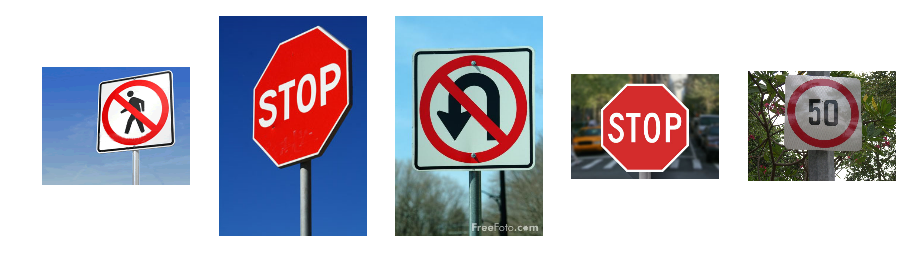

In [73]:
from PIL import Image
import os
plt.rcParams['figure.figsize'] = (11, 11)
f, ax = plt.subplots(1,5)
for i in range(5):
    im = Image.open(os.path.join('Image'+str(i+1)+'.png'))
    ax[i].axis('off')
    ax[i].imshow(im,cmap='gray')

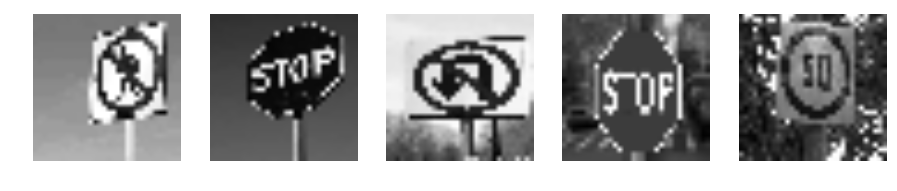

In [74]:
import os
import numpy as np

plt.rcParams['figure.figsize'] = (11, 11)
f, ax = plt.subplots(1,5)
for i in range(5):
    im = Image.open(os.path.join('Image'+str(i+1)+'.png'))
    im.resize((32,32)).save(os.path.join('New_Image'+str(i+1)+'.png'))

New_images = np.zeros((1, 32, 32))
    
for i in range(5):
    im = Image.open(os.path.join('New_Image'+str(i+1)+'.png'))
    im = cv2.cvtColor(np.array(im), cv2.COLOR_BGR2GRAY)
    New_images = np.append(New_images, [im[:,:]], axis=0)
    #print(np.shape(im))
    ax[i].axis('off')
    ax[i].imshow(im,cmap='gray')
New_images = New_images[1:]
#print(np.shape(New_images))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**

    Unfortunately, the model din't perform equally well with new images compare to the images in testing datasets. To be honest, I am not very sure about the reason, because the new images are very clear. It should be easier for the model to predict. 

Label: 32
[False]


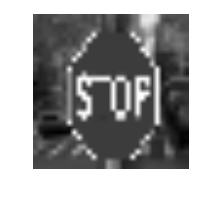

In [75]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
image_size = 32
num_labels = 43 # 43 labels in total
num_channels = 1 # grayscale

batch_size = 64 
patch_size = 5
depth1 = 16
depth2 = 32
depth3 = 64
num_hidden = 64
shape = [batch_size, image_size, image_size, num_channels]

i = 3 # i is from 0 to 4 according to which image is tested.
plt.figure(figsize = (2,2))
im = Image.open(os.path.join('New_Image'+str(i+1)+'.png'))
im = cv2.cvtColor(np.array(im), cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(im,cmap='gray')
new_image = im.reshape((-1, image_size, image_size, 1)).astype(np.float32)

graph = tf.Graph()
with graph.as_default():
  # Input data.
  tf_new_dataset = tf.placeholder(tf.float32, shape=(1, 32, 32, 1))
  # Variables.
  layer1_weights = tf.get_variable("W1", shape=[patch_size, patch_size, num_channels, depth1],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth1]), name='B1')
  
  layer2_weights = tf.get_variable("W2", shape=[patch_size, patch_size, depth1, depth2],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2]), name='B2')
  
  layer3_weights = tf.get_variable("W3", shape=[patch_size, patch_size, depth2, num_hidden],\
           initializer=tf.contrib.layers.xavier_initializer_conv2d())
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]), name='B3')
  
  weights = tf.get_variable("WS1", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  bias = tf.Variable(tf.constant(1.0, shape=[num_labels]), name='BS1')

  # Model.
  def model(data, keep_prob, shape):
    conv = tf.nn.conv2d(data, layer1_weights, [1,1,1,1], padding='VALID', name='C1')
    hidden = tf.nn.relu(conv + layer1_biases)
    lrn = tf.nn.local_response_normalization(hidden)
    max_pool = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], padding='SAME', name='S2')
    conv = tf.nn.conv2d(max_pool, layer2_weights, [1,1,1,1], padding='VALID', name='C3')
    hidden = tf.nn.relu(conv + layer2_biases)
    lrn = tf.nn.local_response_normalization(hidden)
    max_pool = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], padding='SAME', name='S4')
    conv = tf.nn.conv2d(max_pool, layer3_weights, [1,1,1,1], padding='VALID', name='C5')
    hidden = tf.nn.relu(conv + layer3_biases)
    #Dropout before output layer is for reducing overfitting(keep_prob is dropout rate).
    hidden = tf.nn.dropout(hidden, keep_prob)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])  
    logits = tf.matmul(reshape, weights) + bias
    return logits
  
  new_prediction = tf.argmax(tf.nn.softmax(model(tf_new_dataset, 1.0, shape)),1)
  probabilities = tf.nn.softmax(model(tf_new_dataset, 1.0, shape))
  output = tf.nn.in_top_k(probabilities, [1], 5)  
with tf.Session(graph=graph) as session: 
  session.run(tf.global_variables_initializer())  
  loader = tf.train.import_meta_graph('CNN_model.ckpt.meta')
  loader.restore(session, tf.train.latest_checkpoint('./'))
  output, probabilities, new_prediction = session.run([output, probabilities, new_prediction], feed_dict={tf_new_dataset : new_image})
  #new_prediction = tf.argmax(probabilities,1)
  #print ('Probabilities:',probabilities)
  print ('Label:',new_prediction[0]) 
  print (output)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

    Overall, the predicition is not ideal for the new images. As you can see in the probabilities visulization image below, the certain of prediction is too bad no matter which image I choose.
    

[32 27  5 40 26]


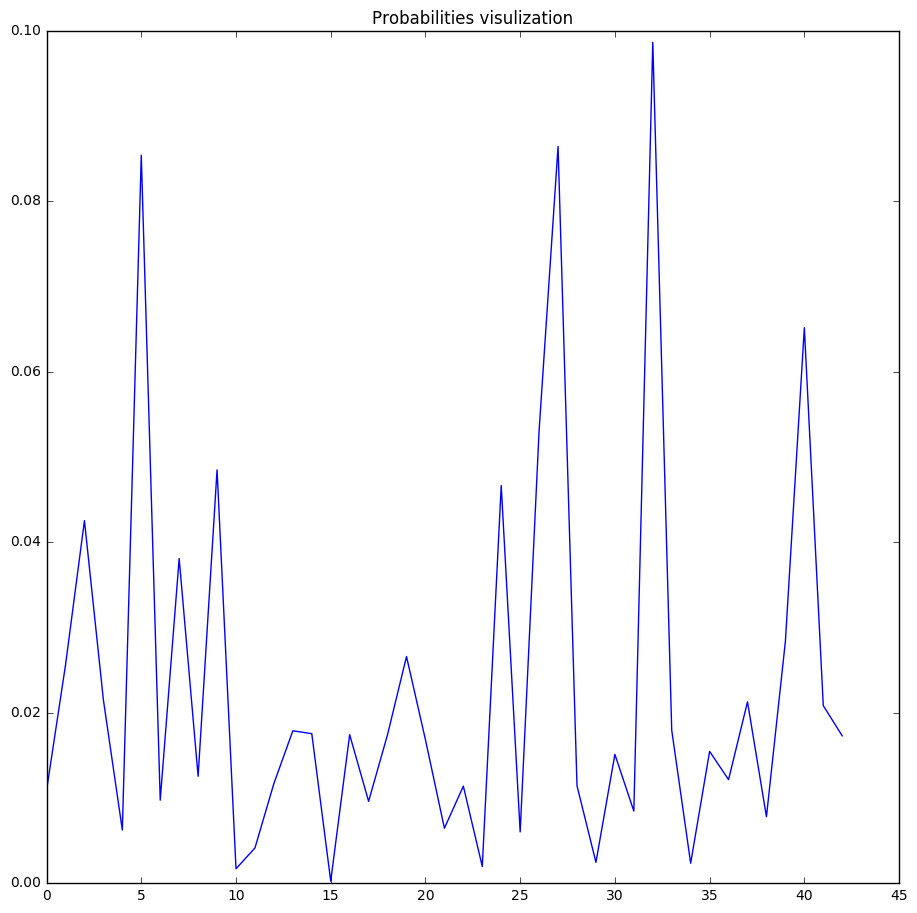

In [76]:
probabilities = probabilities[0]
plt.plot(probabilities)
top5 = np.argsort(probabilities)[::-1][:5]
print(top5)
plt.title("Probabilities visulization")
plt.show()

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

    Here I just deal with the newly-acquired images as how I did to the images in testing datasets, and then use the model again.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.